# Single File (Decay) Analysis and plotting

In [27]:
import pandas as pd
import numpy as np
import glob as gb
import os
import matplotlib.pyplot as plt

from tqdm import tqdm
from scipy.optimize import curve_fit

%matplotlib notebook

In [28]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from Methods.HelperFunctions import decay, fit_decay, analysis, folder_analysis

In [29]:
folder = "T2_reflectance_standard"

# Get raw data files list
directory = "../Data/" + str(folder)
files = gb.glob(directory + "/raw/*.h5")

In [30]:
len(files)

22500

In [48]:
file = files[19400]

# Load HDF file
store = pd.HDFStore(file)
df_file = store['log']

# Create time axis in ms
fs = store['log']['fs'][0]
samples = store['log']['sample_no'][0]
x = np.arange(samples) * fs * 1E3

# Load decay data
y = np.array(store['data'])

# Close hdf5 file
store.close()

In [52]:
# Drop data points at start (weird massive drop for T2)
d = 5
x = x[d::]
y = y[d::]

In [53]:
# Subtract baseline noise
# y -= np.mean(y[-100:])
y -= min(y)
# Normalise
y = y / y[0]

In [54]:
# Locate time where 1/e of normalised intensity
t_loc = np.where(y <= 1/np.e)
# Guess initial fitting parameters
p0 = [1, x[t_loc[0][0]], 0]

# Fit decay
popt, pcov = curve_fit(decay, x, y, p0=p0)
popt

array([  0.98339376,  12.37161992,   0.0220271 ])

<IPython.core.display.Javascript object>


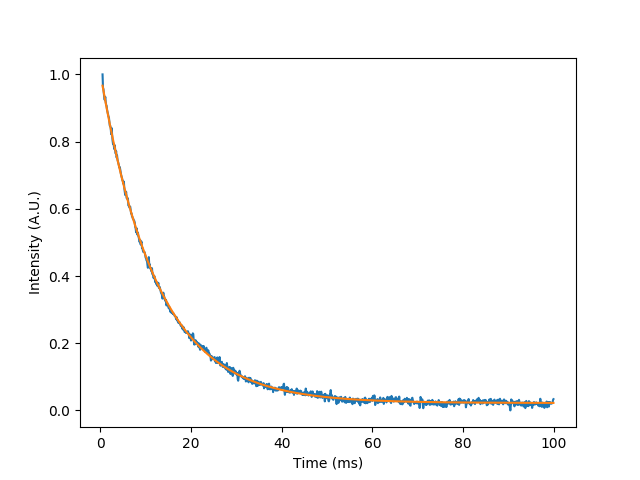

In [55]:
plt.plot(x, y)
plt.plot(x, decay(x, *popt))
plt.xlabel('Time (ms)')
plt.ylabel('Intensity (A.U.)')

In [24]:
plt.savefig('drop 0p5 ms')

# Minimize Fitting

In [62]:
import numpy as np
from scipy.optimize import minimize

In [77]:
# Model Function
def decay_fn(t, a, tau, c):
    """Mono-exponential decay function."""
    return a * np.exp(-t / tau) + c

# Sum-Squared-Error Cost Function
def error_fn(p, x, y):
    return sum((y - decay_fn(x,*p))**2)

In [75]:
# Initial Guess
p0 = [1, 10, 0]

res = minimize(error_fn, p0, args=(x, y),
               method='nelder-mead',
               options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.041466
         Iterations: 143
         Function evaluations: 261


In [76]:
print(res.x)

[  0.98339379  12.37161897   0.02202711]
